# Practice Data Analysis on random data with Pandas and Matplotlib

In this notebook, I'm basically showing that I know how to use some data visualization and manipulation techniques. They're pretty handing when it comes to trying to analyze data. Although machine learning (ML) algorithms are superior at finding correlations, extracting dependencies, or predicting outcomes, pandas and matplotlib are essential to initail visualization and wrangling.

So, for fun, I'm using pokemon data (I played it when I was a kid) and gas prices (could be interesting?). It may as well be any dataset though. Imagine the features were more about business related things.

First, import necessary packages and read in the data file:

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import re

In [30]:
path = "/Users/Blob2/Desktop/Projects/data_files" #create variable for current working directory (where data_file is)
os.chdir(path) #change working directory to variable above [necessary to find data set from where actual data is]

df = pd.read_csv('pokemon_data.csv')    # Reading csv file

Also could have read in a text or excel file with:
- df_xlsx = pd.read_excel('filename.xlsx')    # Reading excel file
- df_txt = pd.read_csv('filename.txt', delimiter='\t')   # Reading txt file seperated by tabs

Now time to look at some random parts of data to get a feel (with pandas):

In [13]:
df.head(3)    # head function

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False


In [6]:
df.columns     # gives columns/headers

Index(['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')


In [7]:
df[['Name', 'HP']][0:5]  #First five items in 'Name' and 'HP' columns

                    Name  HP
0              Bulbasaur  45
1                Ivysaur  60
2               Venusaur  80
3  VenusaurMega Venusaur  80
4             Charmander  39


In [8]:
df.iloc[0:4]      # prints specific row(s) [e.g. 0-3]

   #                   Name Type 1  Type 2  HP  Attack  Defense  Sp. Atk  \
0  1              Bulbasaur  Grass  Poison  45      49       49       65   
1  2                Ivysaur  Grass  Poison  60      62       63       80   
2  3               Venusaur  Grass  Poison  80      82       83      100   
3  3  VenusaurMega Venusaur  Grass  Poison  80     100      123      122   

   Sp. Def  Speed  Generation  Legendary  
0       65     45           1      False  
1       80     60           1      False  
2      100     80           1      False  
3      120     80           1      False  


In [9]:
df.iloc[2,1]     # specific location (R,C)

Venusaur


In [10]:
#Alternative to printing everything one desires [e.g. index/id and name] in a column
for index, row in df.iterrows():
     print(index, row['Name'])

0 Bulbasaur
1 Ivysaur
2 Venusaur
3 VenusaurMega Venusaur
4 Charmander
5 Charmeleon
6 Charizard
7 CharizardMega Charizard X
8 CharizardMega Charizard Y
9 Squirtle
10 Wartortle
11 Blastoise
12 BlastoiseMega Blastoise
13 Caterpie
14 Metapod
15 Butterfree
16 Weedle
17 Kakuna
18 Beedrill
19 BeedrillMega Beedrill
20 Pidgey
21 Pidgeotto
22 Pidgeot
23 PidgeotMega Pidgeot
24 Rattata
25 Raticate
26 Spearow
27 Fearow
28 Ekans
29 Arbok
30 Pikachu
31 Raichu
32 Sandshrew
33 Sandslash
34 Nidoran (Female)
35 Nidorina
36 Nidoqueen
37 Nidoran (Male)
38 Nidorino
39 Nidoking
40 Clefairy
41 Clefable
42 Vulpix
43 Ninetales
44 Jigglypuff
45 Wigglytuff
46 Zubat
47 Golbat
48 Oddish
49 Gloom
50 Vileplume
51 Paras
52 Parasect
53 Venonat
54 Venomoth
55 Diglett
56 Dugtrio
57 Meowth
58 Persian
59 Psyduck
60 Golduck
61 Mankey
62 Primeape
63 Growlithe
64 Arcanine
65 Poliwag
66 Poliwhirl
67 Poliwrath
68 Abra
69 Kadabra
70 Alakazam
71 AlakazamMega Alakazam
72 Machop
73 Machoke
74 Machamp
75 Bellsprout
76 Weepinbell
77 

637 Gothitelle
638 Solosis
639 Duosion
640 Reuniclus
641 Ducklett
642 Swanna
643 Vanillite
644 Vanillish
645 Vanilluxe
646 Deerling
647 Sawsbuck
648 Emolga
649 Karrablast
650 Escavalier
651 Foongus
652 Amoonguss
653 Frillish
654 Jellicent
655 Alomomola
656 Joltik
657 Galvantula
658 Ferroseed
659 Ferrothorn
660 Klink
661 Klang
662 Klinklang
663 Tynamo
664 Eelektrik
665 Eelektross
666 Elgyem
667 Beheeyem
668 Litwick
669 Lampent
670 Chandelure
671 Axew
672 Fraxure
673 Haxorus
674 Cubchoo
675 Beartic
676 Cryogonal
677 Shelmet
678 Accelgor
679 Stunfisk
680 Mienfoo
681 Mienshao
682 Druddigon
683 Golett
684 Golurk
685 Pawniard
686 Bisharp
687 Bouffalant
688 Rufflet
689 Braviary
690 Vullaby
691 Mandibuzz
692 Heatmor
693 Durant
694 Deino
695 Zweilous
696 Hydreigon
697 Larvesta
698 Volcarona
699 Cobalion
700 Terrakion
701 Virizion
702 TornadusIncarnate Forme
703 TornadusTherian Forme
704 ThundurusIncarnate Forme
705 ThundurusTherian Forme
706 Reshiram
707 Zekrom
708 LandorusIncarnate Forme
709 L

In [24]:
df.loc[df['Legendary'] == True] #Only give specified columns of conditions 

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
156,144,Articuno,Ice,Flying,90,85,100,95,125,85,1,True
157,145,Zapdos,Electric,Flying,90,90,85,125,90,100,1,True
158,146,Moltres,Fire,Flying,90,100,90,125,85,90,1,True
162,150,Mewtwo,Psychic,NaN,106,110,90,154,90,130,1,True
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,106,190,100,154,100,130,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


In [14]:
#Sort values based on a-z or ascending numerical
df.sort_values(['HP'], ascending=False)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
261,242,Blissey,Normal,NaN,255,10,10,75,135,55,2,False
121,113,Chansey,Normal,NaN,250,5,5,35,105,50,1,False
217,202,Wobbuffet,Psychic,NaN,190,33,58,33,58,33,2,False
351,321,Wailord,Water,NaN,170,90,45,90,45,60,3,False
655,594,Alomomola,Water,NaN,165,75,80,40,45,65,5,False
...,...,...,...,...,...,...,...,...,...,...,...,...
139,129,Magikarp,Water,NaN,20,10,55,15,20,80,1,False
381,349,Feebas,Water,NaN,20,15,20,10,55,80,3,False
388,355,Duskull,Ghost,NaN,20,40,90,30,90,25,3,False
55,50,Diglett,Ground,NaN,10,55,25,35,45,95,1,False


In [25]:
#Add a column (made from other columns)

# e.g. creating total column and sorting Pokemon by descending total stats
df['Total'] = df['HP'] + df['Attack'] + df['Defense'] + df['Sp. Atk'] + df['Sp. Def'] + df['Speed']
df.sort_values(['Total'], ascending=False)


## different way to add ##
#df['Total'] = df.iloc[:, 4:10].sum(axis=1)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
426,384,RayquazaMega Rayquaza,Dragon,Flying,105,180,100,180,100,115,3,True,780
164,150,MewtwoMega Mewtwo Y,Psychic,NaN,106,150,70,194,120,140,1,True,780
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,106,190,100,154,100,130,1,True,780
422,382,KyogrePrimal Kyogre,Water,NaN,100,150,90,180,160,90,3,True,770
424,383,GroudonPrimal Groudon,Ground,Fire,100,180,160,150,90,90,3,True,770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13,10,Caterpie,Bug,NaN,45,30,35,20,20,45,1,False,195
288,265,Wurmple,Bug,NaN,45,45,35,20,30,20,3,False,195
446,401,Kricketot,Bug,NaN,37,25,41,25,41,25,4,False,194
322,298,Azurill,Normal,Fairy,50,20,40,20,40,20,3,False,190


In [26]:
#Drop a column --> e.g. drop 'new' total column
df = df.drop(columns=['Total'])

In [31]:
#Moving a column though avoid coding 'hard' numbers ~ use index instead #### e.g. moving legendary column
cols = list(df.columns.values)
df = df[cols[0:4] + [cols[-1]] + cols[4:-1]]
df.head()

,#,Name,Type 1,Type 2,Legendary,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,1,Bulbasaur,Grass,Poison,False,45,49,49,65,65,45,1
1,2,Ivysaur,Grass,Poison,False,60,62,63,80,80,60,1
2,3,Venusaur,Grass,Poison,False,80,82,83,100,100,80,1
3,3,VenusaurMega Venusaur,Grass,Poison,False,80,100,123,122,120,80,1
4,4,Charmander,Fire,NaN,False,39,52,43,60,50,65,1


In [37]:
#Filtering by Multiple conditions
sorted_df = df.loc[(df['Type 1'] == 'Fire') | (df['Type 2'] == 'Fighting') & (df['HP'] > 300)]
sorted_df.head()

,#,Name,Type 1,Type 2,Legendary,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
4,4,Charmander,Fire,NaN,False,39,52,43,60,50,65,1
5,5,Charmeleon,Fire,NaN,False,58,64,58,80,65,80,1
6,6,Charizard,Fire,Flying,False,78,84,78,109,85,100,1
7,6,CharizardMega Charizard X,Fire,Dragon,False,78,130,111,130,85,100,1
8,6,CharizardMega Charizard Y,Fire,Flying,False,78,104,78,159,115,100,1


In [38]:
#Reset index numbers after filtration
sorted_df.reset_index(drop=True, inplace=True)
sorted_df.head()

,#,Name,Type 1,Type 2,Legendary,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,4,Charmander,Fire,NaN,False,39,52,43,60,50,65,1
1,5,Charmeleon,Fire,NaN,False,58,64,58,80,65,80,1
2,6,Charizard,Fire,Flying,False,78,84,78,109,85,100,1
3,6,CharizardMega Charizard X,Fire,Dragon,False,78,130,111,130,85,100,1
4,6,CharizardMega Charizard Y,Fire,Flying,False,78,104,78,159,115,100,1


In [41]:
#Finding specific strings contains within column
df.loc[df['Name'].str.contains('To')]

## opposite of above
# df.loc[~df['Name'].str.contains('Mega')]  

,#,Name,Type 1,Type 2,Legendary,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
172,158,Totodile,Water,NaN,False,50,65,64,44,48,43,2
189,175,Togepi,Fairy,NaN,False,35,20,65,40,65,20,2
190,176,Togetic,Fairy,Flying,False,55,40,85,80,105,40,2
276,255,Torchic,Fire,NaN,False,45,60,40,70,50,45,3
355,324,Torkoal,Fire,NaN,False,70,85,140,85,70,20,3
434,389,Torterra,Grass,Ground,False,95,109,105,75,85,56,4
504,454,Toxicroak,Poison,Fighting,False,83,106,65,86,65,85,4
519,468,Togekiss,Fairy,Flying,False,85,50,95,120,115,80,4
702,641,TornadusIncarnate Forme,Flying,NaN,True,79,115,70,125,80,111,5
703,641,TornadusTherian Forme,Flying,NaN,True,79,100,80,110,90,121,5


In [45]:
#similar to above, but using regex -- flags to ignore case; regex=True to use
df.loc[df['Name'].str.contains('^pi[a-z]', flags=re.I, regex=True)]

,#,Name,Type 1,Type 2,Legendary,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
20,16,Pidgey,Normal,Flying,False,40,45,40,35,35,56,1
21,17,Pidgeotto,Normal,Flying,False,63,60,55,50,50,71,1
22,18,Pidgeot,Normal,Flying,False,83,80,75,70,70,101,1
23,18,PidgeotMega Pidgeot,Normal,Flying,False,83,80,80,135,80,121,1
30,25,Pikachu,Electric,NaN,False,35,55,40,50,50,90,1
136,127,Pinsir,Bug,NaN,False,65,125,100,55,70,85,1
137,127,PinsirMega Pinsir,Bug,Flying,False,65,155,120,65,90,105,1
186,172,Pichu,Electric,NaN,False,20,40,15,35,35,60,2
219,204,Pineco,Bug,NaN,False,50,65,90,35,35,15,2
239,221,Piloswine,Ice,Ground,False,100,100,80,60,60,50,2


In [48]:
#Change variables within columns
df.loc[df['Type 1'] == 'Fire', 'Type 1'] = 'Flamer'
df.loc[df['Type 1'] == 'Grass', 'Type 1'] = 'Plant'
df.head()

,#,Name,Type 1,Type 2,Legendary,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,1,Bulbasaur,Plant,Poison,False,45,49,49,65,65,45,1
1,2,Ivysaur,Plant,Poison,False,60,62,63,80,80,60,1
2,3,Venusaur,Plant,Poison,False,80,82,83,100,100,80,1
3,3,VenusaurMega Venusaur,Plant,Poison,False,80,100,123,122,120,80,1
4,4,Charmander,Flamer,NaN,False,39,52,43,60,50,65,1


In [49]:
#Aggregate statistics(groupby)
df.groupby(['Type 1']).mean().sort_values('Defense', ascending=False)
#shows means of other columns sorted by Type 1; descending by defense catergory
#In other words, which type has the highest defense

,#,Legendary,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
Type 1,,,,,,,,,
Steel,442.851852,0.148148,65.222222,92.703704,126.370370,67.518519,80.629630,55.259259,3.851852
Rock,392.727273,0.090909,65.363636,92.863636,100.795455,63.340909,75.477273,55.909091,3.454545
Dragon,474.375000,0.375000,83.312500,112.125000,86.375000,96.843750,88.843750,83.031250,3.875000
Ground,356.281250,0.125000,73.781250,95.750000,84.843750,56.468750,62.750000,63.906250,3.156250
Ghost,486.500000,0.062500,64.437500,73.781250,81.187500,79.343750,76.468750,64.343750,4.187500
Water,303.089286,0.035714,72.062500,74.151786,72.946429,74.812500,70.517857,65.964286,2.857143
Ice,423.541667,0.083333,72.000000,72.750000,71.416667,77.541667,76.291667,63.458333,3.541667
Plant,344.871429,0.042857,67.271429,73.214286,70.800000,77.500000,70.428571,61.928571,3.357143
Bug,334.492754,0.000000,56.884058,70.971014,70.724638,53.869565,64.797101,61.681159,3.217391


In [54]:
#Show number of type 1's groupedby
df.groupby(['Type 1']).count()['#']

Type 1
Bug          69
Dark         31
Dragon       32
Electric     44
Fairy        17
Fighting     27
Flamer       52
Flying        4
Ghost        32
Ground       32
Ice          24
Normal       98
Plant        70
Poison       28
Psychic      57
Rock         44
Steel        27
Water       112
Name: #, dtype: int64

In [57]:
#Even more specific --> "Of certain type 1, there are __ type 2s of this subtype" 
df.groupby(['Type 1', 'Type 2']).count()['#'].head()

Type 1  Type 2  
Bug     Electric     2
        Fighting     2
        Fire         2
        Flying      14
        Ghost        1
Name: #, dtype: int64

In [61]:
#If working with large amounts of data
    #Loading in smaller sizes are a time --> chunksize=rows at a time
    #Adding on chunks to new dataframe (new_df) of a certain catergory to make a small dataframe

new_df = pd.DataFrame(columns=df.columns)

for df in pd.read_csv('pokemon_data.csv', chunksize=5):
    results = df.groupby(['Type 1']).count()
    new_df = pd.concat([new_df, results])


In [ ]:
## Exporting data in 3 forms ##
df.to_csv('modified.csv', index=False)
df.to_excel('modifed.xlsx', index=False)
df.to_csv('modified.txt', index=False, sep='\t')

## That was a lot of pandas. Let's use some matplotlib (and a little pandas):

In [62]:
# 1) read in data w/ pandas AND parsing by year (because it is temporal data)
gas = pd.read_csv('gas_prices.csv', parse_dates=['Year'])

In [63]:
# 1.5) (optional) show all columns when doing head() or tail()
pd.set_option('display.max_columns', 500)

In [64]:
#  2) Some descriptions of read csv
print(gas.shape)   # gives total (rows, column)
print(gas.info())  # gives each column type (^^know to parse by type='datetime')
print(gas.head())

(19, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Year         19 non-null     datetime64[ns]
 1   Australia    18 non-null     float64       
 2   Canada       19 non-null     float64       
 3   France       19 non-null     float64       
 4   Germany      19 non-null     float64       
 5   Italy        19 non-null     float64       
 6   Japan        19 non-null     float64       
 7   Mexico       19 non-null     float64       
 8   South Korea  19 non-null     float64       
 9   UK           19 non-null     float64       
 10  USA          19 non-null     float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 1.8 KB
None
        Year  Australia  Canada  France  Germany  Italy  Japan  Mexico  \
0 1990-01-01        NaN    1.87    3.63     2.65   4.59   3.16    1.00   
1 1991-01-01       1.96    1.92    3.4

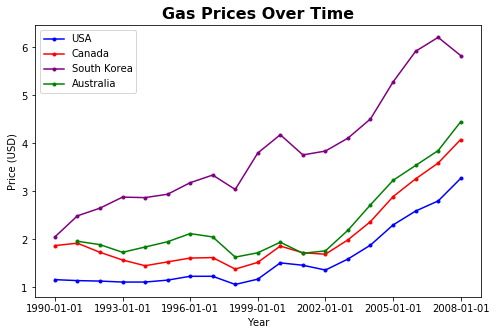

In [71]:
#3) start plotting by x,y
plt.figure(figsize=(8, 5))
plt.title("Gas Prices Over Time", fontdict={'fontweight': 'bold', 'fontsize': 16})

#  4) manual entry of select data
plt.plot(gas['Year'], gas['USA'], label='USA', color='b', marker='.')
plt.plot(gas['Year'], gas['Canada'], label='Canada', color='r', marker='.')
plt.plot(gas['Year'], gas['South Korea'], label='South Korea', color='purple', marker='.')
plt.plot(gas['Year'], gas['Australia'], label='Australia', color='green', marker='.')

#  5) some visual essentials 
plt.xticks(gas['Year'][::3]) #every three years
plt.xlabel("Year")

plt.ylabel("Price (USD)")

plt.legend()

plt.show()

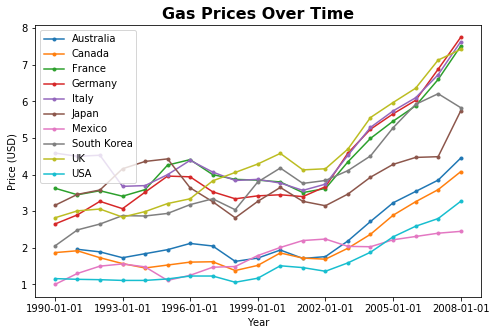

In [73]:
plt.figure(figsize=(8, 5))
plt.title("Gas Prices Over Time", fontdict={'fontweight': 'bold', 'fontsize': 16})

#  6) loop to plot all columns (rather than manual entry)
for country in gas:
    if country != "Year":
        plt.plot(gas['Year'], gas[country], label=country, marker='.')
        
plt.xticks(gas['Year'][::3]) #every three years
plt.xlabel("Year")

plt.ylabel("Price (USD)")

plt.legend()

plt.show()

In [76]:
#To save figure
plt.savefig('my_gassy_graph.png')

<Figure size 432x288 with 0 Axes>